<a href="https://colab.research.google.com/github/KP-Akshay04/Reggression/blob/master/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import files
upload= files.upload()

Saving weather.xlsx to weather (2).xlsx


In [44]:
import numpy as numpyInstance
import pandas as pandasInstance
import matplotlib.pyplot as matplotlibInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as matplotlibInstance
import os
for dirname, _,filesname in os.walk('/kaggle/input'):
    for filename in filesname:
        print(os.path.join(dirname,filename))

In [ ]:
weatherData = pandasInstance.read_excel('weather (1).xlsx')
weatherData.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [11]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

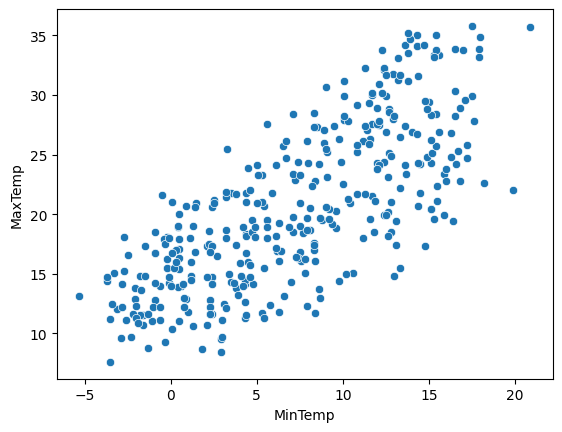

In [13]:
sns.scatterplot(x='MinTemp',y='MaxTemp',data=weatherData)

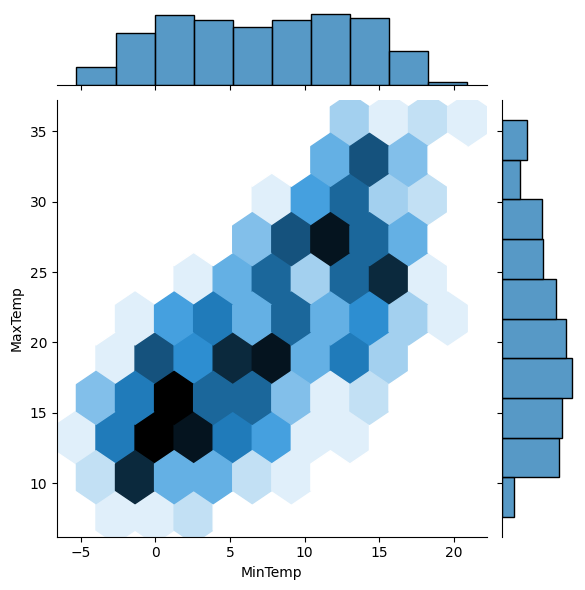

In [16]:
sns.jointplot(x='MinTemp',y='MaxTemp',data=weatherData,kind='hex')

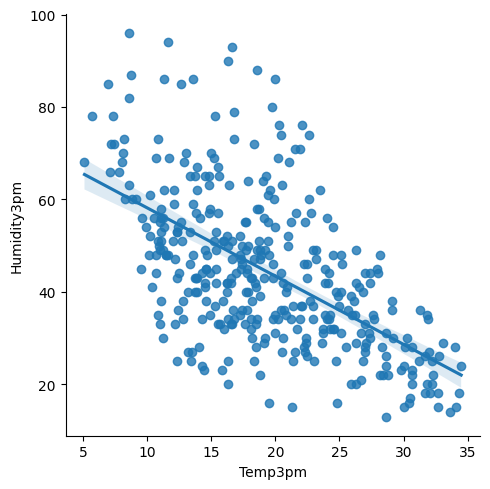

In [27]:
seabornInstance.lmplot(x='Temp3pm', y='Humidity3pm', data=weatherData)

In [28]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

/tmp/ipython-input-2278180270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weatherData['MaxTemp'])


<Axes: xlabel='MaxTemp', ylabel='Density'>

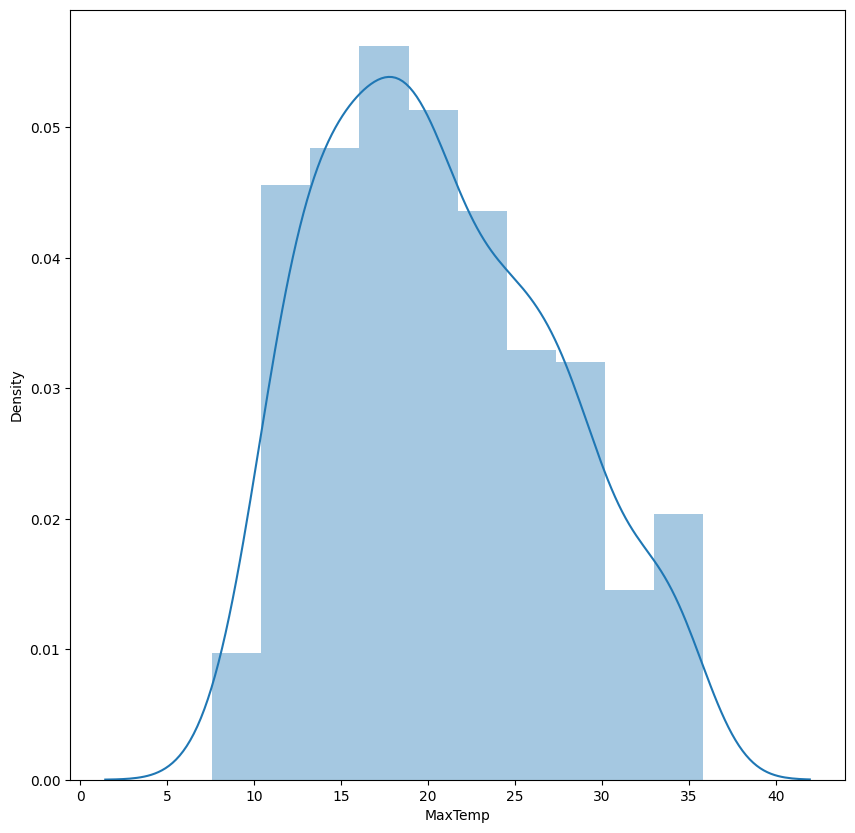

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(weatherData['MaxTemp'])

In [31]:
Y_prediction=weatherData[['Temp3pm']]
Y_prediction

,Temp3pm
0,23.6
1,25.7
2,20.2
3,14.1
4,15.4
...,...
361,30.0
362,28.2
363,18.3
364,25.9


In [34]:
y_Prediction = weatherData[['MinTemp']]
print(y_Prediction)

     MinTemp
0        8.0
1       14.0
2       13.7
3       13.3
4        7.6
..       ...
361      9.0
362      7.1
363     12.5
364     12.5
365     12.3

[366 rows x 1 columns]


In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
temperaturePrediction=model.predict(X_test)
print(temperaturePrediction)

[23.41302965 13.08685652 27.26485614 25.46187353 26.93704112 20.0529257
 29.31370001 13.82444032 17.43040554 19.56120317 20.87246325 25.21601226
 16.44696048 16.44696048 13.33271779 16.36500672 16.52891423 22.01981582
 20.62660198 23.98670594 24.06865969 18.08603558 27.18290238 14.56202411
 14.3981166  12.43122648 28.08439369 26.36336483 24.970151   15.79133044
 22.83935337 21.85590831 24.72428973 28.08439369 23.82279843 19.64315692
 25.8716423  25.46187353 12.7590415  28.2483012  14.31616285 14.97179289
 13.82444032 15.62742293 27.10094863 17.92212807 15.05374664 18.33189684
 13.33271779 24.47842847 19.15143439 18.08603558 15.29960791 20.38074072
 27.67462491 22.5934921  22.10176957 25.8716423  29.23174626 29.23174626
 17.18454427 13.25076403 21.36418578 23.08521463 20.954417   14.97179289
 26.28141108 20.62660198 14.3981166  20.21683321 27.67462491 21.44613953
 24.970151   14.07030158]


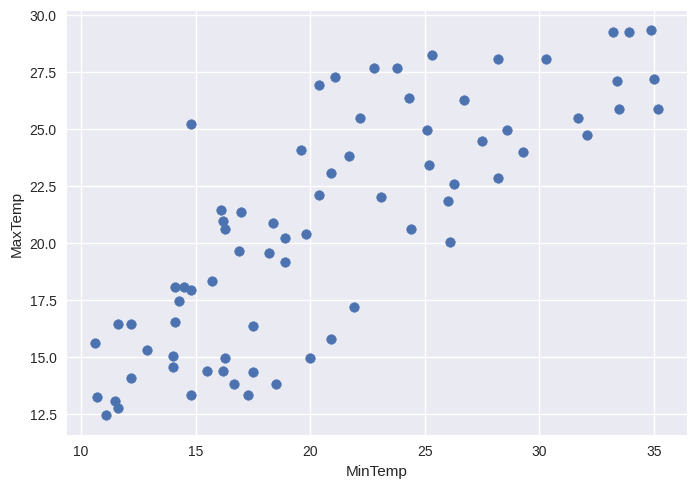

In [46]:
matplotlibInstance.style.use('seaborn-v0_8')
matplotlibInstance.scatter(y_test,temperaturePrediction)
matplotlibInstance.xlabel('MinTemp')
matplotlibInstance.ylabel('MaxTemp')
matplotlibInstance.show()

/tmp/ipython-input-2757590232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-temperaturePrediction)


<Axes: xlabel='MaxTemp', ylabel='Density'>

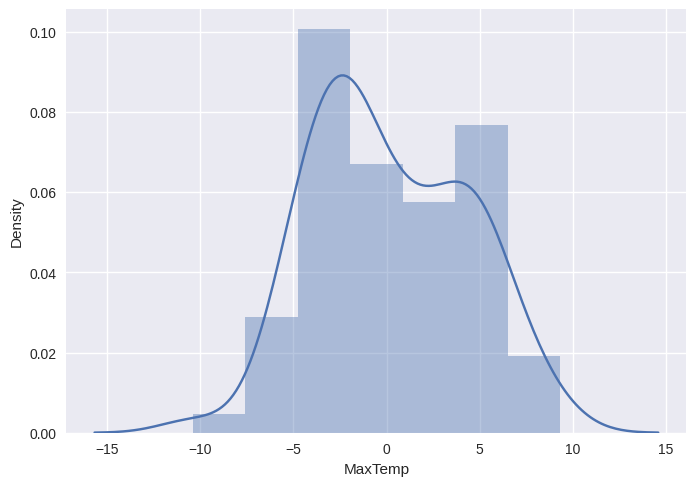

In [47]:
sns.distplot(y_test-temperaturePrediction)

In [48]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,temperaturePrediction)

3.5094353112899594

In [49]:
metrics.mean_squared_error(y_test,temperaturePrediction)

17.011877668640622

In [50]:
numpyInstance.sqrt(metrics.mean_squared_error(y_test,temperaturePrediction))

np.float64(4.124545753006096)

In [52]:
model.coef_

array([0.81953755])